In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [52]:
df = pd.read_csv(r"C:\Users\oconn\OneDrive\Desktop\GIS\co2-emissions\data/co2_emissions_kt_by_country.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


In [53]:
df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [54]:
df.isnull().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

Exploratory Data Analysis

In [55]:
top_emitters = df.groupby('country_name')['value'].sum().sort_values(ascending=False).head(10)
print(top_emitters)

country_name
World                        1.317557e+09
High income                  6.672858e+08
IDA & IBRD total             6.667335e+08
OECD members                 6.537873e+08
IBRD only                    6.398760e+08
Low & middle income          6.390232e+08
Post-demographic dividend    6.369414e+08
Middle income                6.296777e+08
Upper middle income          4.823171e+08
Late-demographic dividend    4.673344e+08
Name: value, dtype: float64


In [56]:
unique_countries = df["country_name"].unique()
print(unique_countries)

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'Antigua and Barbuda'
 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao' 'Cayman Islands'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Central Asia'
 'Ecuador' 'Egypt

In [57]:
aggregates = [
    'Africa Eastern and Southern','Africa Western and Central','Arab World',
    'Central Europe and the Baltics','East Asia & Pacific (excluding high income)',
    'East Asia & Pacific','Europe & Central Asia (excluding high income)',
    'Europe & Central Asia','Euro area','European Union',
    'Fragile and conflict affected situations','High income',
    'Heavily indebted poor countries (HIPC)','IBRD only','IDA & IBRD total',
    'IDA total','IDA blend','IDA only',
    'Latin America & Caribbean (excluding high income)','Latin America & Caribbean',
    'Least developed countries: UN classification','Low income',
    'Lower middle income','Low & middle income','Middle income',
    'Middle East & North Africa','Middle East & North Africa (excluding high income)',
    'North America','OECD members','Other small states',
    'Pre-demographic dividend','Post-demographic dividend','South Asia',
    'Sub-Saharan Africa (excluding high income)','Sub-Saharan Africa',
    'Small states','East Asia & Pacific (IDA & IBRD countries)',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)',
    'Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World', 
    'Late-demographic dividend', 'Early-demographic dividend', 'Caribbean small states'
]

#~ = negates the condition (keeps rows not in aggregates)
#reset_index(drop=True) cleans up the row index

df_countries = df[~df['country_name'].isin(aggregates)]
df_countries = df_countries.reset_index(drop=True)
print(df_countries['country_name'].unique())

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba'
 'Curacao' 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt, Arab Rep.' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland'
 'Fiji' 'France' 'Faroe Islands' 'Micronesia, Fed. Sts.' 'Gabon'
 'United Kingdom' 'Georgia' 'Ghana' 'Gibraltar' 'Guinea' 'Gambia, The'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Greenland'
 'Guatemala' 'Guyana' 'Hong Kong SAR, C

In [58]:
top_emitters = df_countries.groupby('country_name')['value'].sum().sort_values(ascending=False).head(10)
print(top_emitters)

country_name
United States         2.840366e+08
China                 2.159975e+08
Russian Federation    1.344118e+08
Japan                 5.726082e+07
India                 4.816875e+07
United Kingdom        3.278625e+07
Canada                2.609352e+07
Germany               2.436702e+07
France                2.296071e+07
Italy                 2.123551e+07
Name: value, dtype: float64


In [59]:
low_emitters = df_countries.groupby('country_name')['value'].sum().sort_values(ascending=True).head(10)
print(low_emitters)

country_name
Tuvalu                        299.999996
Kiribati                     2120.060003
Sint Maarten (Dutch part)    2145.195000
Turks and Caicos Islands     3036.276000
Sao Tome and Principe        3257.740996
Marshall Islands             3570.000032
Micronesia, Fed. Sts.        3870.000001
Tonga                        4376.749982
Vanuatu                      4831.814979
Nauru                        4859.902991
Name: value, dtype: float64


In [60]:
df_pop = pd.read_csv(r"C:\Users\oconn\OneDrive\Desktop\GIS\co2-emissions\data/population_by_country_2020.csv")
df_pop.head()
df_pop.info()
df_pop.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.322744e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.353034e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.994905e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.460109e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.067170e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000


In [61]:
list_unique = df_countries['country_name'].unique()
print(list_unique)

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba'
 'Curacao' 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt, Arab Rep.' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland'
 'Fiji' 'France' 'Faroe Islands' 'Micronesia, Fed. Sts.' 'Gabon'
 'United Kingdom' 'Georgia' 'Ghana' 'Gibraltar' 'Guinea' 'Gambia, The'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Greenland'
 'Guatemala' 'Guyana' 'Hong Kong SAR, C

In [62]:
print(len(list_unique))

209


In [63]:
pop_unique = df_pop['Country (or dependency)'].unique()
print(len(pop_unique))

235


In [64]:
df_emissions_2020 = df_countries[df_countries["year"] == 2016]
merged = pd.merge(df_emissions_2020, df_pop, left_on=['country_name'], right_on=['Country (or dependency)'], how='inner')
merged.head()

,country_code,country_name,year,value,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,ABW,Aruba,2016,883.747000,Aruba,106845,0.43 %,452,593,180,201.0,1.9,41,44 %,0.00 %
1,AFG,Afghanistan,2016,5300.000191,Afghanistan,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
2,AGO,Angola,2016,29760.000229,Angola,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
3,ALB,Albania,2016,4480.000019,Albania,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
4,AND,Andorra,2016,469.999999,Andorra,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %


In [65]:
print(len(merged))
print(merged.isnull().sum())

175
country_code                0
country_name                0
year                        0
value                       0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             12
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64


Core Derived Metric: Emissions per Capita

In [66]:
merged['emissions_per_capita'] = merged['value'] / merged['Population (2020)']

In [67]:
merged[['country_name', 'emissions_per_capita']].head()

,country_name,emissions_per_capita
0,Aruba,0.008271
1,Afghanistan,0.000136
2,Angola,0.000901
3,Albania,0.001557
4,Andorra,0.006081


Core Dervied Metric: Emissions per km2

In [68]:
merged['emissions_per_km2'] = merged['value'] / merged['Land Area (Km²)']

In [69]:
merged[['country_name', 'emissions_per_km2']].head()

,country_name,emissions_per_km2
0,Aruba,4.909706
1,Afghanistan,0.008118
2,Angola,0.023871
3,Albania,0.163504
4,Andorra,1.000000


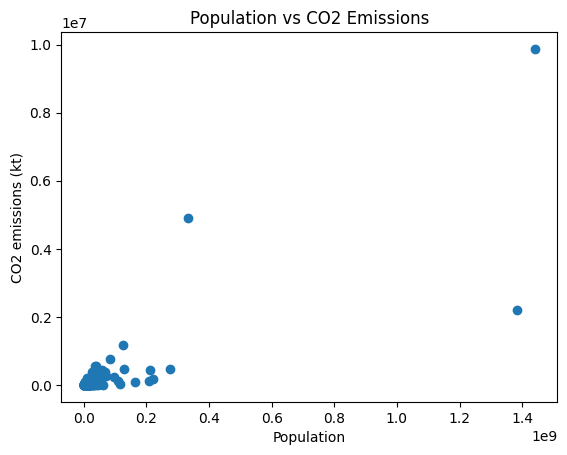

In [70]:
plt.scatter(merged['Population (2020)'], merged['value'])
plt.xlabel("Population")
plt.ylabel("CO2 emissions (kt)")
plt.title("Population vs CO2 Emissions")
plt.show()

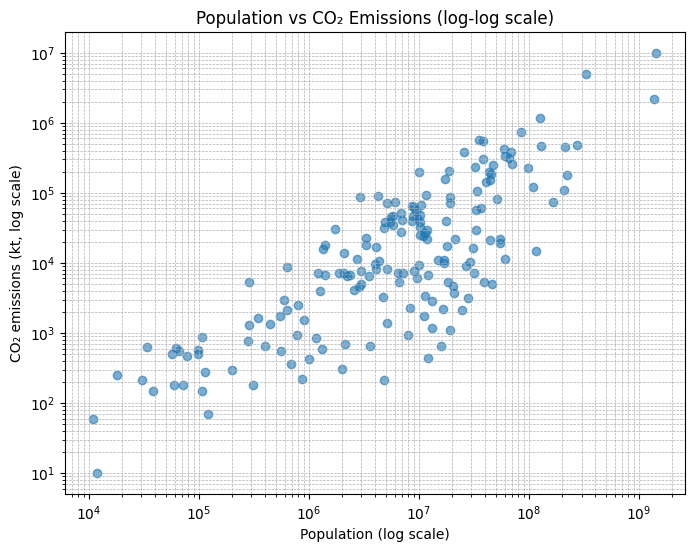

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(merged['Population (2020)'], merged['value'], alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Population (log scale)")
plt.ylabel("CO₂ emissions (kt, log scale)")
plt.title("Population vs CO₂ Emissions (log-log scale)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

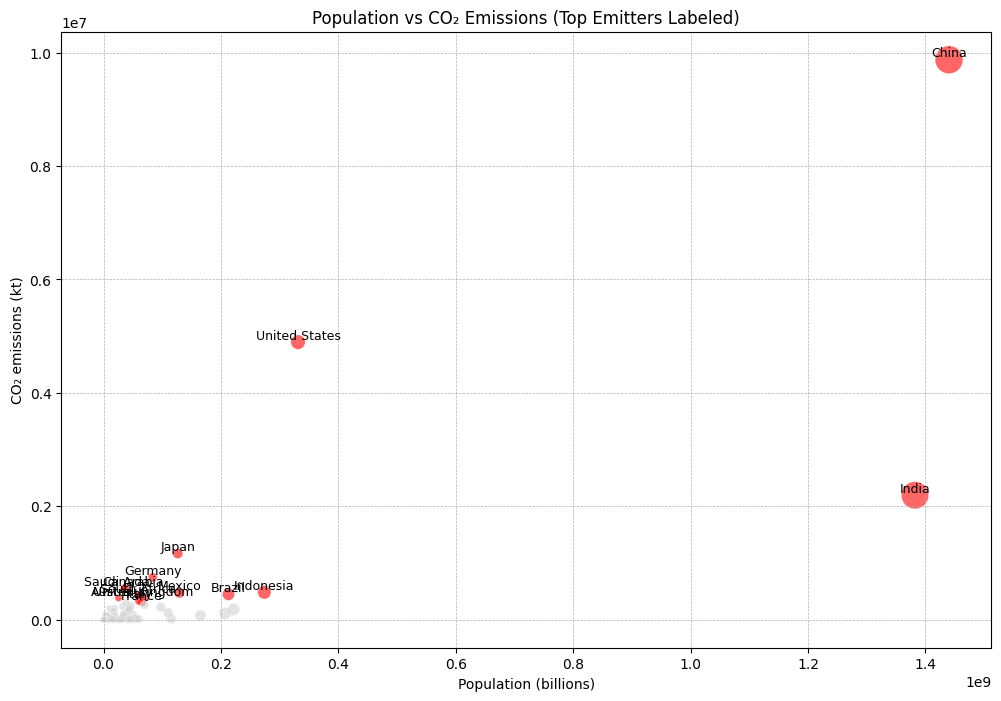

In [72]:
plt.figure(figsize=(12,8))

# Highlight top emitters
top_emitters = merged.sort_values('value', ascending=False).head(15)
merged['highlight'] = 'Other countries'
merged.loc[merged['country_name'].isin(top_emitters['country_name']), 'highlight'] = 'Top emitters'

sns.scatterplot(
    data=merged,
    x='Population (2020)',
    y='value',
    size='Population (2020)',
    sizes=(20, 400),
    alpha=(0.6),
    hue = 'highlight',
    palette={'Top emitters':'red', 'Other countries':'lightgrey'},
    legend=False
)

# Annotate top N countries
top_emitters = merged.sort_values('value', ascending=False).head(15)
for i, row in top_emitters.iterrows():
    plt.text(
        row['Population (2020)'], 
        row['value'], 
        row['country_name'], 
        fontsize=9,
        ha='center', 
        va='bottom'
    )

plt.xlabel("Population (billions)")
plt.ylabel("CO₂ emissions (kt)")
plt.title("Population vs CO₂ Emissions (Top Emitters Labeled)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

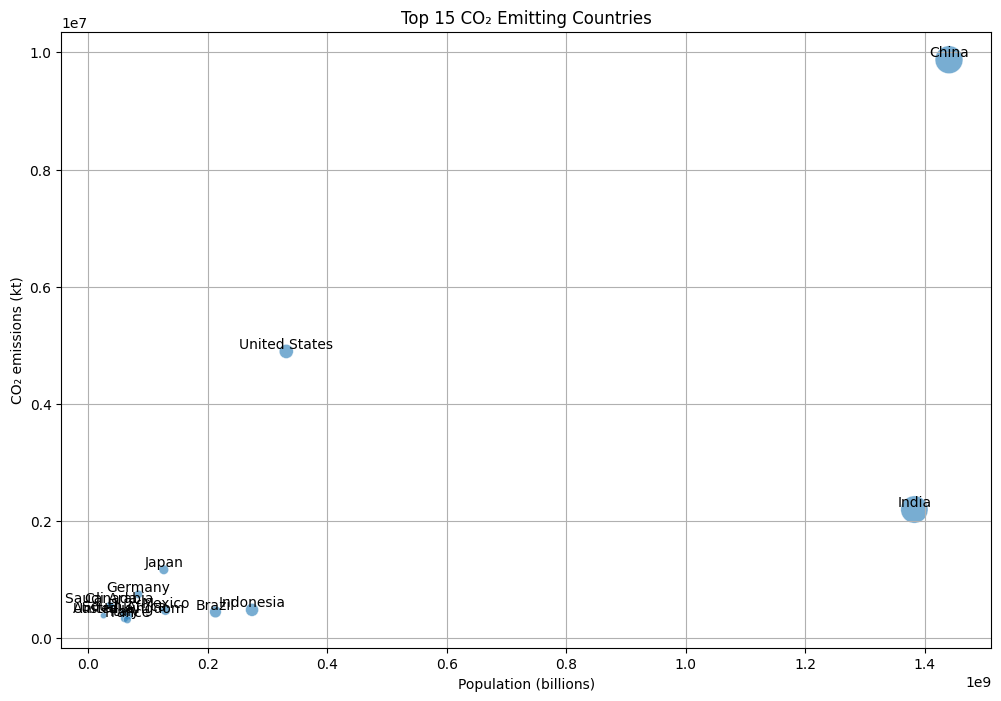

In [73]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=top_emitters,
    x='Population (2020)',
    y='value',
    size='Population (2020)',
    sizes=(20, 400),
    alpha=0.6,
    legend=False
)

# Annotate each country
for i, row in top_emitters.iterrows():
    plt.text(
        row['Population (2020)'],
        row['value'],
        row['country_name'],
        fontsize=10,
        ha='center',
        va='bottom'
    )

plt.xlabel("Population (billions)")
plt.ylabel("CO₂ emissions (kt)")
plt.title("Top 15 CO₂ Emitting Countries")
plt.grid(True)
plt.show()

Bar Chart top 15 emitters

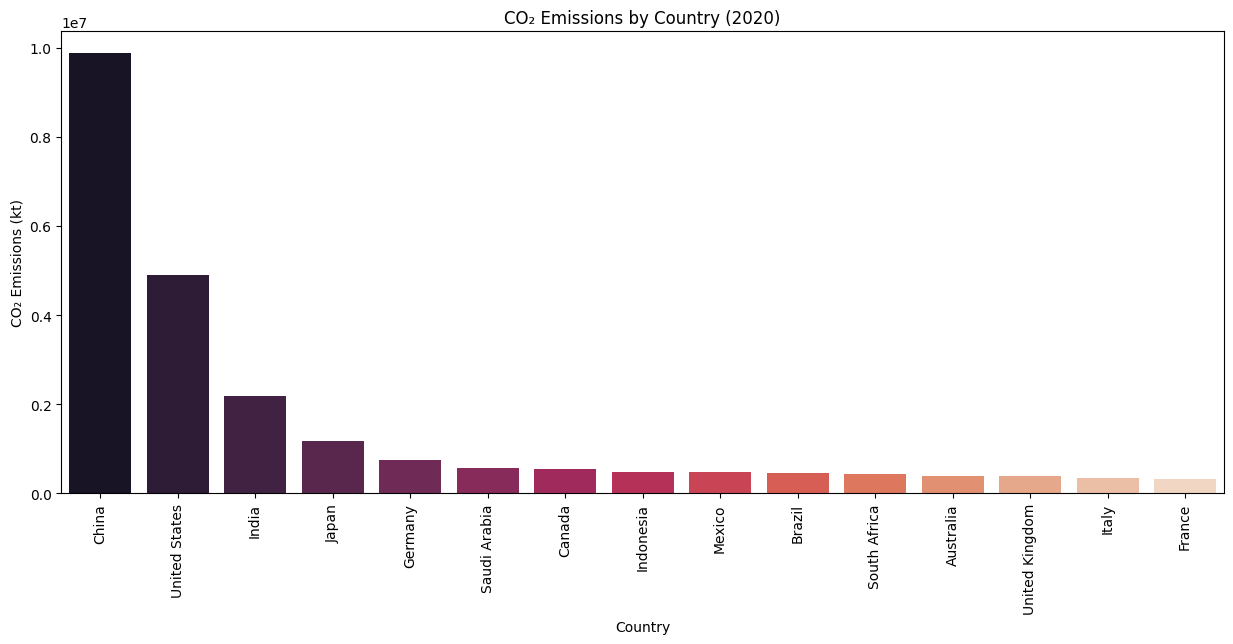

In [88]:
bar_chart_sorted = top_emitters.sort_values('value', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(
    data=bar_chart_sorted,
    x='country_name', 
    y='value',
    hue='country_name',
    palette='rocket',
    legend=False
)

plt.xticks(rotation=90)  # rotate x-axis labels for readability
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions (kt)")
plt.title("CO₂ Emissions by Country (2020)")
plt.show()

Bar chart top 15 emitters per cap

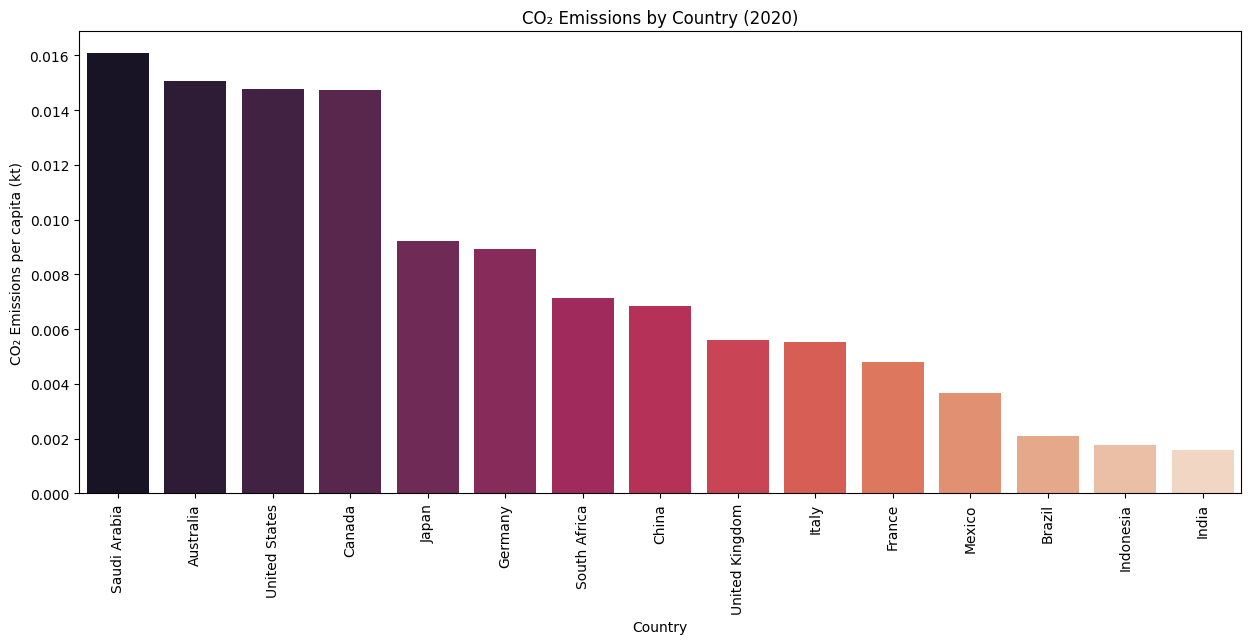

In [90]:
bar_chart_sorted = top_emitters.sort_values('emissions_per_capita', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(
    data=bar_chart_sorted,
    x='country_name', 
    y='emissions_per_capita',
    hue='country_name',
    palette='rocket',
    legend=False
)

plt.xticks(rotation=90)  # rotate x-axis labels for readability
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions per capita (kt)")
plt.title("CO₂ Emissions by Country (2020)")
plt.show()

Choropleth Total Emissions

In [81]:
max_val = merged['value'].max()

fig = px.choropleth(
    merged,
    locations='country_name',
    locationmode='country names',
    color='value',
    hover_name='country_name',
    color_continuous_scale='Viridis',
    range_color=[0, max_val],
    title='CO₂ Emissions (2020)'
)
fig.show()

C:\Users\oconn\AppData\Local\Temp\ipykernel_20716\2041778610.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [80]:
max_val = merged['emissions_per_capita'].max()

fig = px.choropleth(
    merged,
    locations='country_name',
    locationmode='country names',
    color='emissions_per_capita',
    hover_name='country_name',
    color_continuous_scale='Viridis',
    range_color=[0, max_val],
    title='CO₂ Emissions per Capita (2020)'
)
fig.show()

C:\Users\oconn\AppData\Local\Temp\ipykernel_20716\3519119009.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



Median Age vs c02 per cap

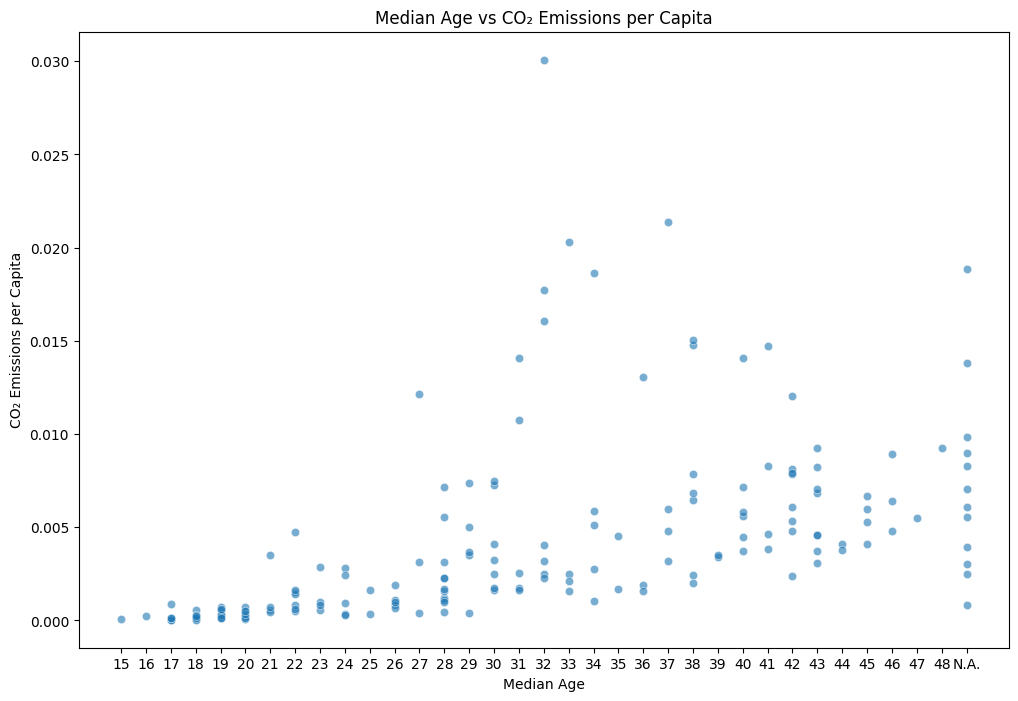

In [95]:
plot = merged[['Med. Age', 'emissions_per_capita']]

# Sort the DataFrame by median age
plot_sorted = plot.sort_values('Med. Age')

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=plot_sorted,
    x='Med. Age',  # categorical x-axis
    y='emissions_per_capita',
    alpha=0.6
)

plt.xlabel("Median Age")
plt.ylabel("CO₂ Emissions per Capita")
plt.title("Median Age vs CO₂ Emissions per Capita")
plt.show()

In [77]:
plot_sorted['Med. Age'].min(), plot_sorted['Med. Age'].max()

('15', 'N.A.')

Urbanisation vs CO2 per cap

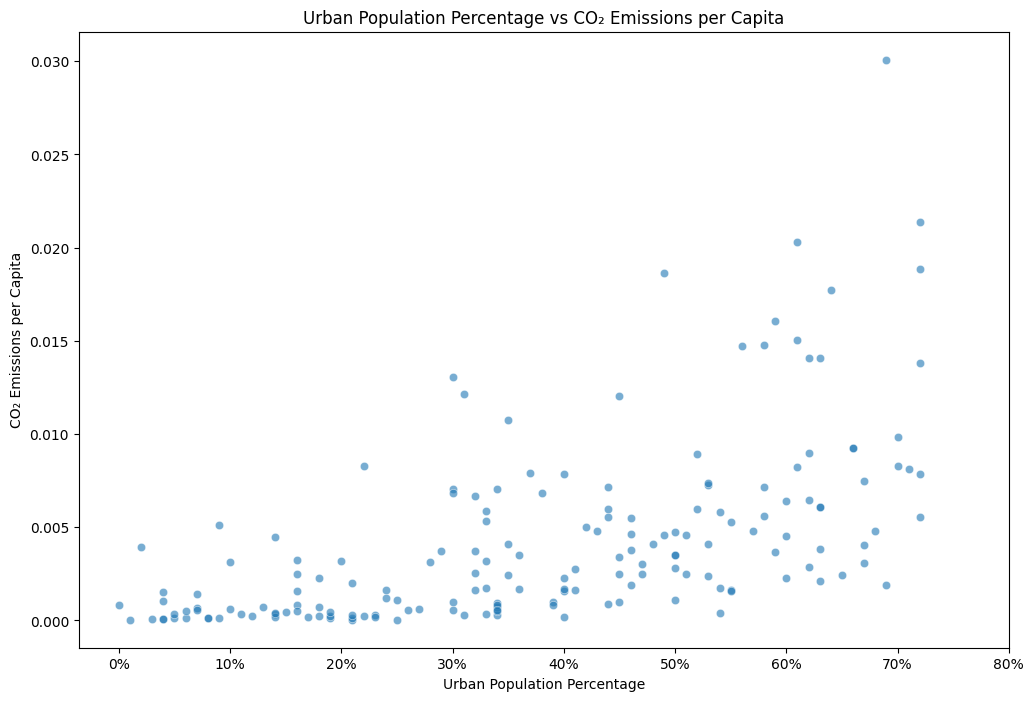

In [78]:
urban_plot = merged.dropna(subset=['Urban Pop %', 'emissions_per_capita'])

urban_plot_sorted=urban_plot.sort_values('Urban Pop %')

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=urban_plot_sorted,
    x='Urban Pop %',
    y='emissions_per_capita',
    alpha=0.6
)

# Custom x-axis ticks
custom_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.xticks(custom_ticks, [f"{t}%" for t in custom_ticks])
plt.xlabel("Urban Population Percentage")    
plt.ylabel("CO₂ Emissions per Capita") 
plt.title("Urban Population Percentage vs CO₂ Emissions per Capita")
plt.show()

Fert rate vs C02 per cap